In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
netflix = pd.read_csv('netflix1.csv')

In [3]:
netflix

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
netflix.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
# movie production by country
total_movies_by_country = netflix.groupby(['type', 'country'])['show_id'].count().reset_index()
total_movies_by_country

,type,country,show_id
0,Movie,Argentina,56
1,Movie,Australia,61
2,Movie,Austria,8
3,Movie,Bangladesh,3
4,Movie,Belgium,9
...,...,...,...
133,TV Show,Ukraine,2
134,TV Show,United Arab Emirates,1
135,TV Show,United Kingdom,251
136,TV Show,United States,845


In [7]:
total_movies_by_country = total_movies_by_country.rename(columns={'show_id': 'count'})
total_movies_by_country

,type,country,count
0,Movie,Argentina,56
1,Movie,Australia,61
2,Movie,Austria,8
3,Movie,Bangladesh,3
4,Movie,Belgium,9
...,...,...,...
133,TV Show,Ukraine,2
134,TV Show,United Arab Emirates,1
135,TV Show,United Kingdom,251
136,TV Show,United States,845


In [8]:
# creating two separate data frames for movies and tv shows
movies_data = total_movies_by_country[total_movies_by_country['type'] == 'Movie'].sort_values('count', ascending=False).reset_index(drop=True)
tv_shows_data = total_movies_by_country[total_movies_by_country['type'] == 'TV Show'].sort_values('count', ascending=False).reset_index(drop=True)

#### Exploring movie data

In [9]:
print(movies_data.head(10))

    type         country  count
0  Movie   United States   2395
1  Movie           India    976
2  Movie  United Kingdom    387
3  Movie       Not Given    257
4  Movie          Canada    187
5  Movie          France    148
6  Movie           Spain    129
7  Movie           Egypt    109
8  Movie         Nigeria     96
9  Movie          Mexico     90


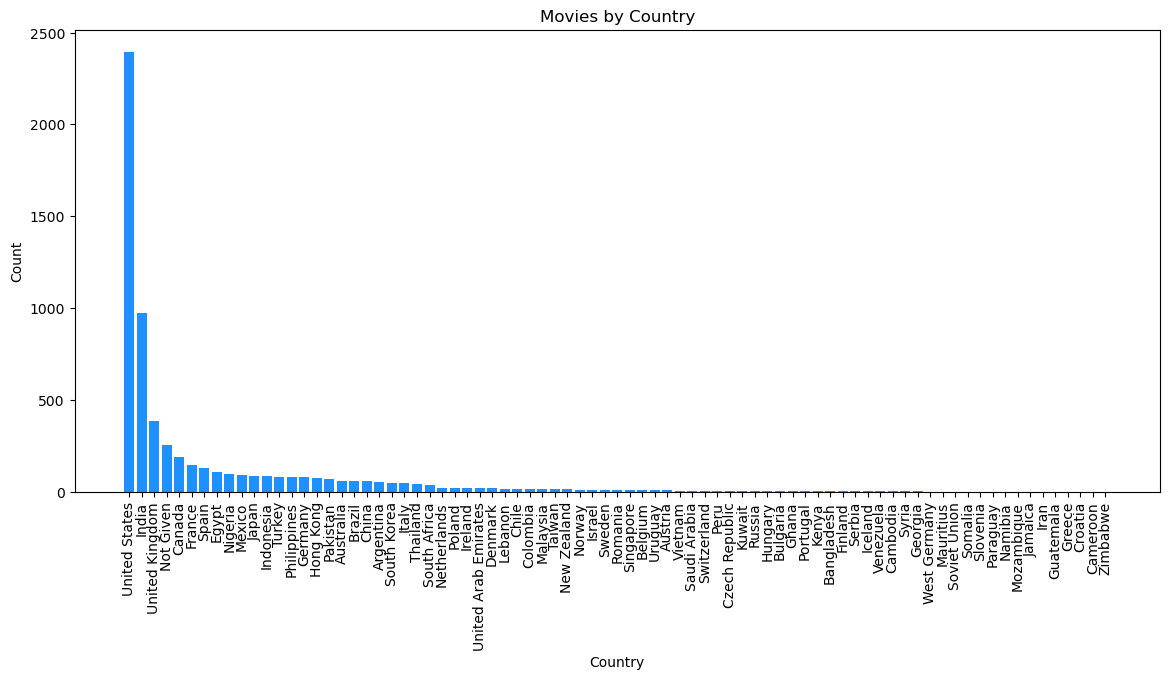

In [10]:
# visualizing movie production by country
plt.figure(figsize=(14, 6))
plt.bar(movies_data['country'], movies_data['count'], color='dodgerblue')
plt.xticks(rotation=90)
plt.title('Movies by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.savefig('Movies.png', dpi=300, bbox_inches='tight')
plt.show()

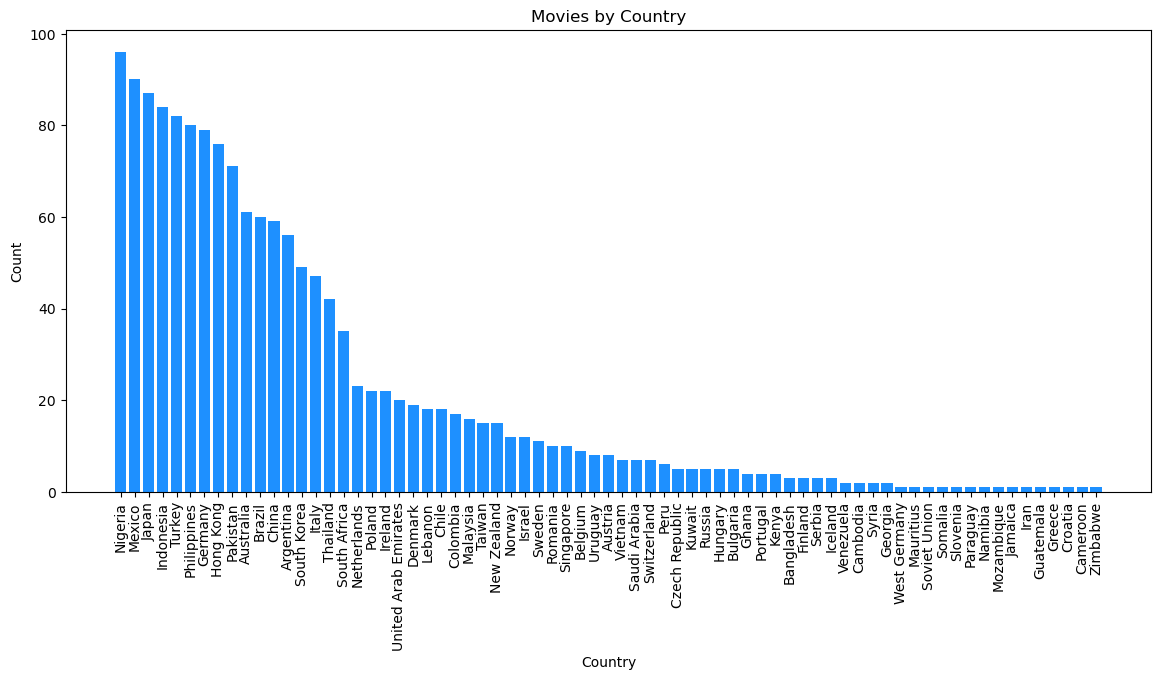

In [11]:
# visualizing movie production by country while excluding the 'largest' producing countries
few_movies = movies_data[movies_data['count'] < 100]
plt.figure(figsize=(14, 6))
plt.bar(few_movies['country'], few_movies['count'], color='dodgerblue')
plt.xticks(rotation=90)
plt.title('Movies by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.savefig('Movies2.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
# mapping country names to their respective continents
import pycountry_convert as pc
def get_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        return continent_code
    except KeyError:
        return None

movies_data['continent'] = movies_data['country'].apply(get_continent)

In [13]:
print(movies_data.head())

    type         country  count continent
0  Movie   United States   2395        NA
1  Movie           India    976        AS
2  Movie  United Kingdom    387        EU
3  Movie       Not Given    257      None
4  Movie          Canada    187        NA


### Performance of continents

In [14]:
# countries from every continent
countries_per_continent = movies_data.groupby(['continent'])['country'].count().sort_values(ascending=False).reset_index()
countries_per_continent

,continent,country
0,EU,26
1,AS,24
2,AF,11
3,SA,8
4,NA,5
5,OC,2


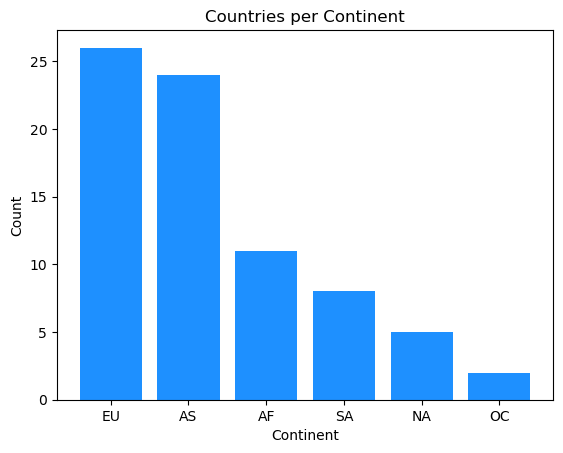

In [15]:
plt.bar(countries_per_continent['continent'], countries_per_continent['country'], color = 'dodgerblue')
plt.title('Countries per Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.savefig('Countries per Continent.png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
# movies from every continent
movies_by_continent = movies_data.groupby(['continent'])['count'].sum().sort_values(ascending=False).reset_index()
movies_by_continent

,continent,count
0,NA,2674
1,AS,1726
2,EU,969
3,AF,254
4,SA,168
5,OC,76


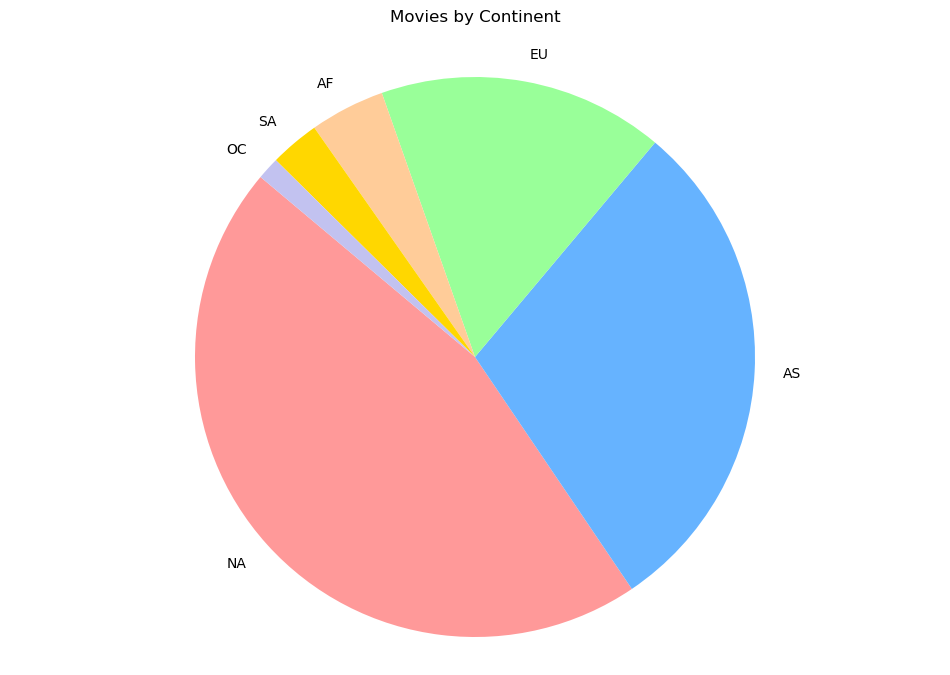

In [17]:
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', '#C2C2F0']
plt.figure(figsize=(12, 8))
plt.pie(movies_by_continent['count'], labels=movies_by_continent['continent'], startangle=140, colors=colors)
plt.title('Movies by Continent', pad=20)
plt.axis('equal')
plt.savefig('Movies by Continent1.png', dpi=300, bbox_inches='tight')
plt.show()

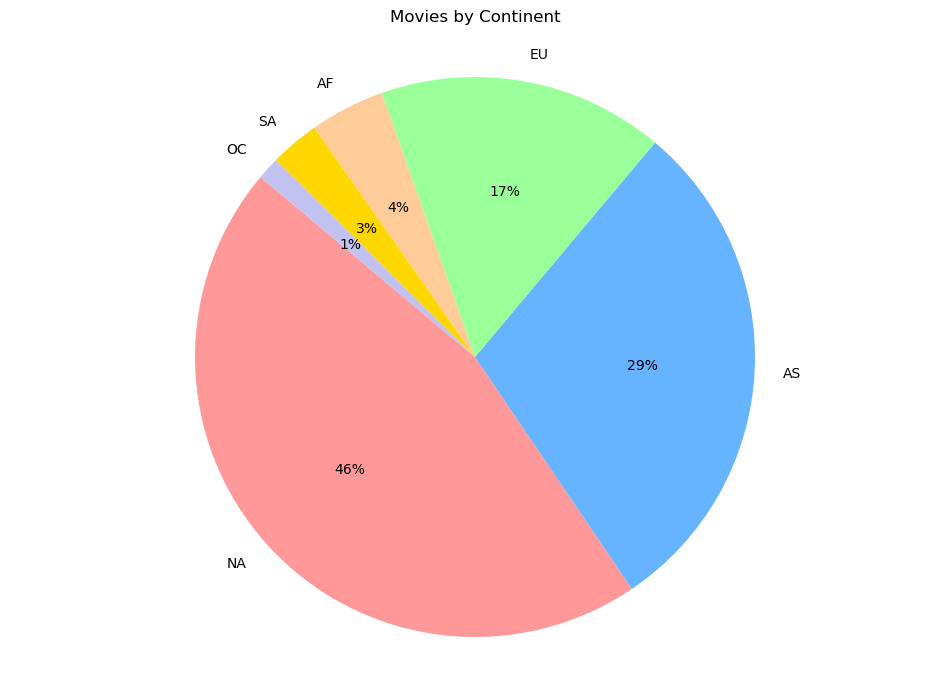

In [18]:
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', '#C2C2F0']
plt.figure(figsize=(12, 8))
plt.pie(movies_by_continent['count'], labels=movies_by_continent['continent'], autopct='%1.0f%%', startangle=140, colors=colors)
plt.title('Movies by Continent', pad=20)
plt.axis('equal')
plt.savefig('Movies by Continent2.png', dpi=300, bbox_inches='tight')
plt.show()

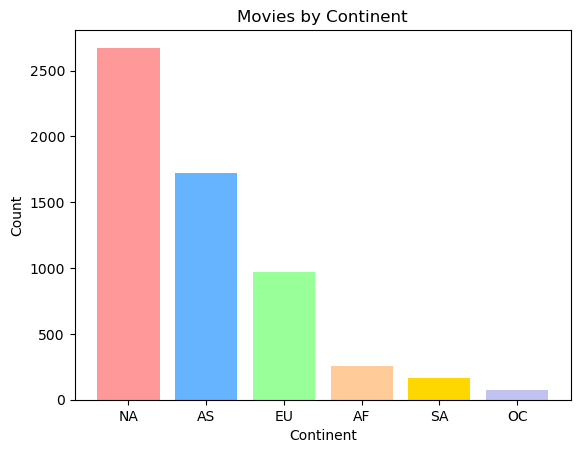

In [19]:
plt.bar(movies_by_continent['continent'], movies_by_continent['count'], color = colors)
plt.title('Movies by Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.savefig('Movies by Continent3.png', dpi=300, bbox_inches='tight')
plt.show()

### Performamnce of Countries per continent

In [20]:
african_movies = movies_data[movies_data['continent'] == 'AF']
african_movies

,type,country,count,continent
7,Movie,Egypt,109,AF
8,Movie,Nigeria,96,AF
24,Movie,South Africa,35,AF
53,Movie,Ghana,4,AF
55,Movie,Kenya,4,AF
65,Movie,Mauritius,1,AF
67,Movie,Somalia,1,AF
70,Movie,Namibia,1,AF
71,Movie,Mozambique,1,AF
77,Movie,Cameroon,1,AF


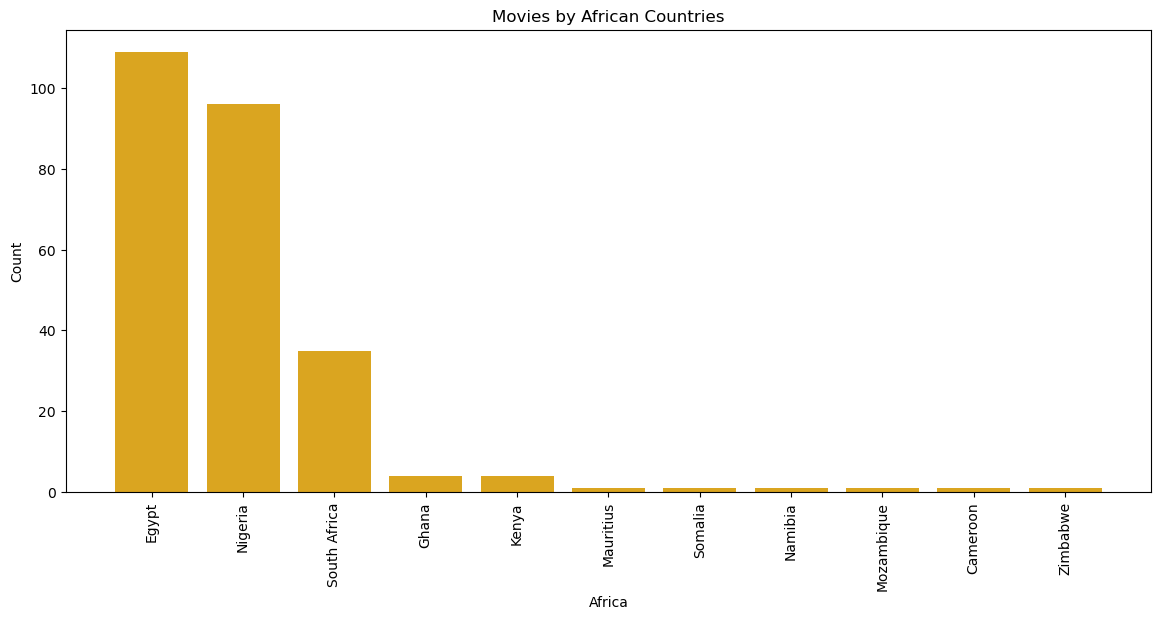

In [21]:
plt.figure(figsize=(14, 6))
plt.bar(african_movies['country'], african_movies['count'], color = 'goldenrod')
plt.xticks(rotation=90)
plt.title('Movies by African Countries')
plt.xlabel('Africa')
plt.ylabel('Count')
plt.savefig('African Movies.png', dpi=300, bbox_inches='tight')
plt.show()

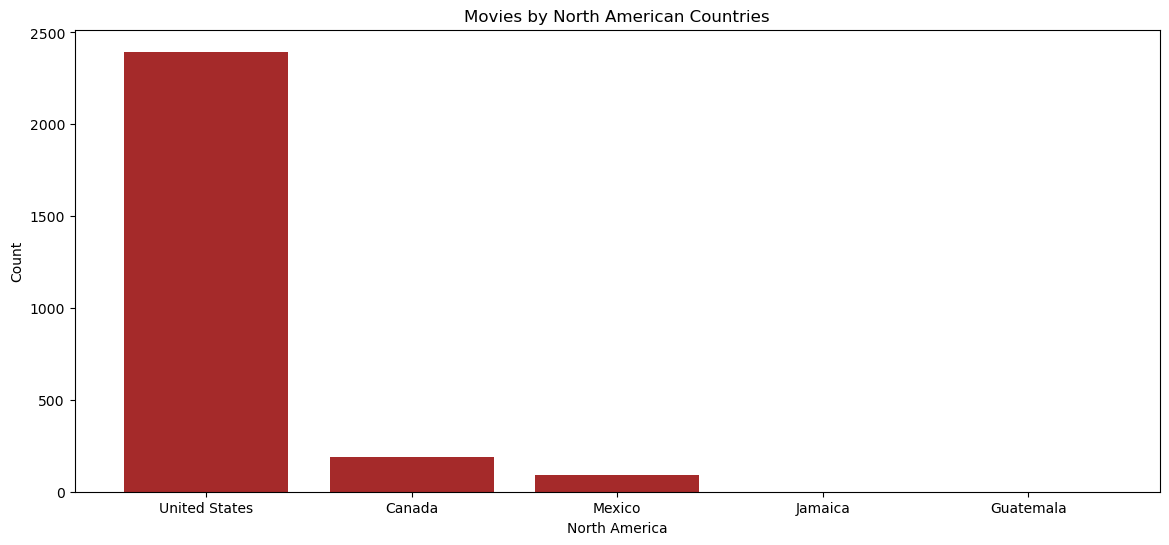

In [22]:
north_america_movies = movies_data[movies_data['continent'] == 'NA']
plt.figure(figsize=(14, 6))
plt.bar(north_america_movies['country'], north_america_movies['count'], color = 'brown')
plt.title('Movies by North American Countries')
plt.xlabel('North America')
plt.ylabel('Count')
plt.savefig('North American Movies.png', dpi=300, bbox_inches='tight')
plt.show()

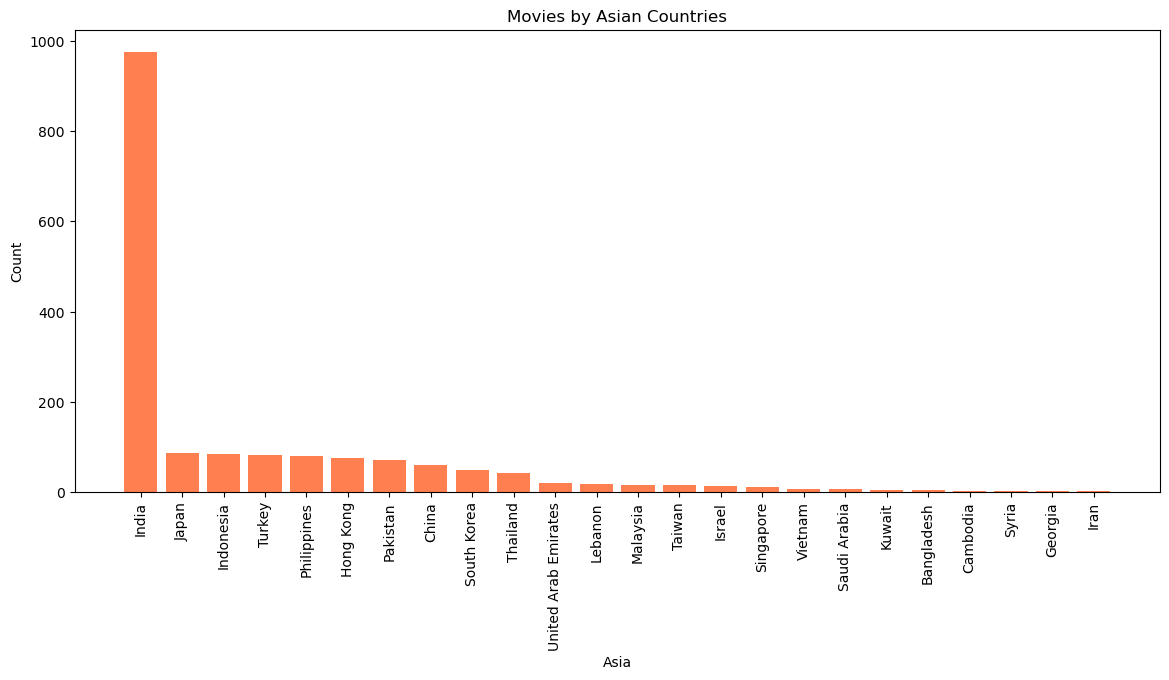

In [23]:
asia_movies = movies_data[movies_data['continent'] == 'AS']
plt.figure(figsize=(14, 6))
plt.bar(asia_movies['country'], asia_movies['count'], color = 'coral')
plt.xticks(rotation=90)
plt.title('Movies by Asian Countries')
plt.xlabel('Asia')
plt.ylabel('Count')
plt.savefig('Asian Movies.png', dpi=300, bbox_inches='tight')
plt.show()

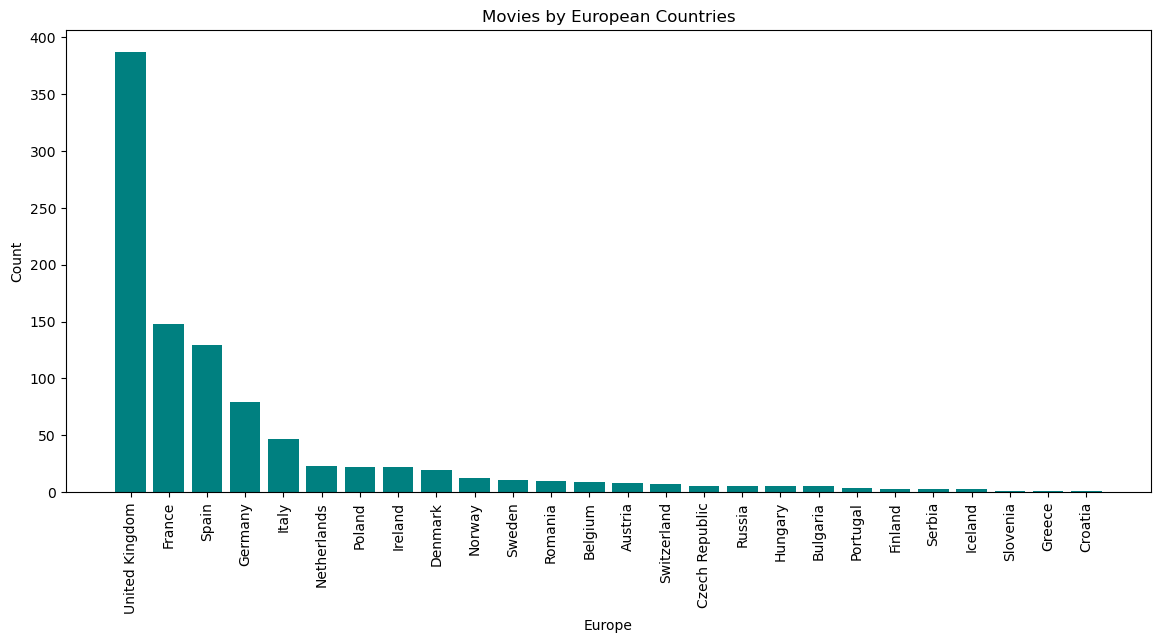

In [24]:
europe_movies = movies_data[movies_data['continent'] == 'EU']
plt.figure(figsize=(14, 6))
plt.bar(europe_movies['country'], europe_movies['count'], color = 'teal')
plt.xticks(rotation=90)
plt.title('Movies by European Countries')
plt.xlabel('Europe')
plt.ylabel('Count')
plt.savefig('European Movies.png', dpi=300, bbox_inches='tight')
plt.show()

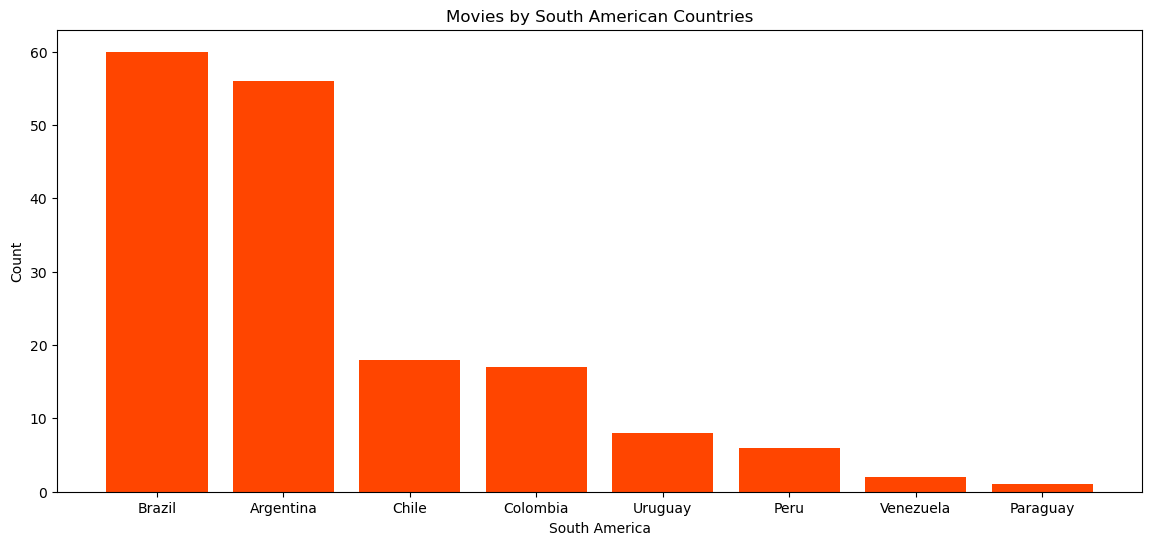

In [25]:
south_america_movies = movies_data[movies_data['continent'] == 'SA']
plt.figure(figsize=(14, 6))
plt.bar(south_america_movies['country'], south_america_movies['count'], color = 'orangered')
plt.title('Movies by South American Countries')
plt.xlabel('South America')
plt.ylabel('Count')
plt.savefig('South America Movies.png', dpi=300, bbox_inches='tight')
plt.show()

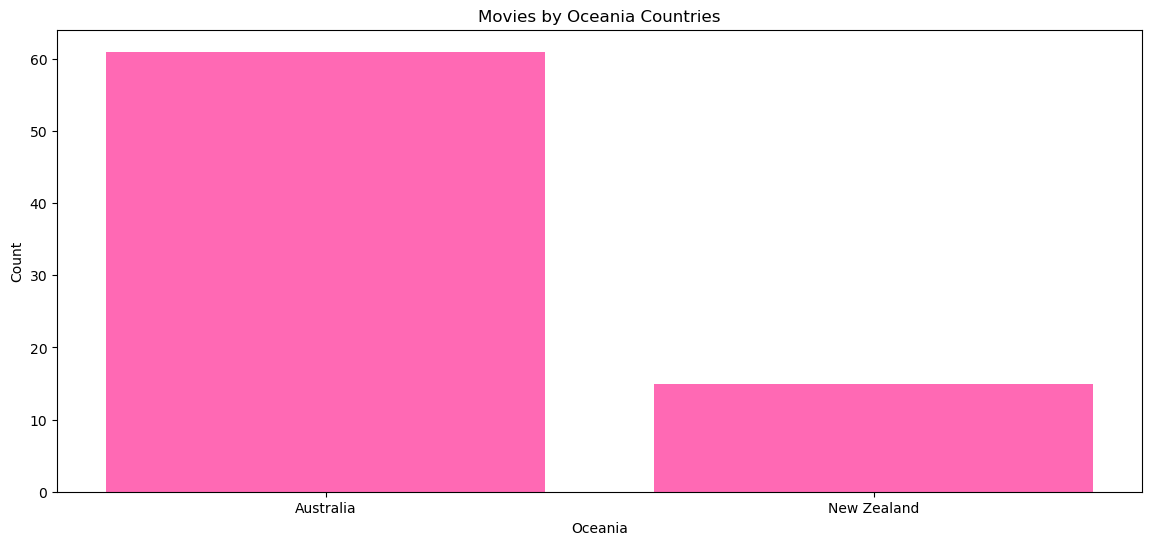

In [26]:
oceania_movies = movies_data[movies_data['continent'] == 'OC']
plt.figure(figsize=(14, 6))
plt.bar(oceania_movies['country'], oceania_movies['count'], color = 'hotpink')
plt.title('Movies by Oceania Countries')
plt.xlabel('Oceania')
plt.ylabel('Count')
plt.savefig('Oceania Movies.png', dpi=300, bbox_inches='tight')
plt.show()

### World Map

In [27]:
import geopandas as gpd
world = gpd.read_file("countries/ne_110m_admin_0_countries.shp")

In [28]:
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [29]:
# checking for contradictions in country naming conventions
world.head(10)['SOVEREIGNT']

0                           Fiji
1    United Republic of Tanzania
2                 Western Sahara
3                         Canada
4       United States of America
5                     Kazakhstan
6                     Uzbekistan
7               Papua New Guinea
8                      Indonesia
9                      Argentina
Name: SOVEREIGNT, dtype: object

In [30]:
movies_data.head(10)['country']

0     United States
1             India
2    United Kingdom
3         Not Given
4            Canada
5            France
6             Spain
7             Egypt
8           Nigeria
9            Mexico
Name: country, dtype: object

* There are differences in some names such as that of the USA

In [31]:
# harmonizing the contradictions in names
world_countries = set(world['SOVEREIGNT'].unique())
movies_countries = set(movies_data['country'].unique())

# countries in movies_data but not in world
unmatched_movies = movies_countries - world_countries

# countries in world but not in movies_data
unmatched_world = world_countries - movies_countries

print("Countries in movies_data but not in world dataset:")
print(unmatched_movies)

print("\nCountries in world dataset but not in movies_data:")
print(unmatched_world)

Countries in movies_data but not in world dataset:
{'Hong Kong', 'Singapore', 'West Germany', 'Czech Republic', 'Soviet Union', 'Mauritius', 'Serbia', 'United States', 'Not Given'}

Countries in world dataset but not in movies_data:
{'Somaliland', 'Haiti', 'Equatorial Guinea', 'Rwanda', 'Uganda', 'Kyrgyzstan', 'Republic of the Congo', 'East Timor', 'Guinea-Bissau', 'Kosovo', 'Burkina Faso', 'Solomon Islands', 'eSwatini', 'Algeria', 'North Korea', 'Myanmar', 'Fiji', 'Luxembourg', 'Nicaragua', 'Belarus', 'Czechia', 'Montenegro', 'Honduras', 'Kazakhstan', 'Lithuania', 'Bosnia and Herzegovina', 'Cuba', 'Costa Rica', 'Jordan', 'Turkmenistan', 'Oman', 'Antarctica', 'Ethiopia', 'Benin', 'Gabon', 'Suriname', 'Moldova', 'Estonia', 'Bhutan', 'Azerbaijan', 'Vanuatu', 'Burundi', 'Democratic Republic of the Congo', 'Malawi', 'Western Sahara', 'Panama', 'Nepal', 'Ukraine', 'Afghanistan', 'Tunisia', 'Mongolia', 'Papua New Guinea', 'Iraq', 'Lesotho', 'Yemen', 'Gambia', 'Central African Republic', 'Sri

In [32]:
country_name_mapping = {
    'United States': 'United States of America',
    'Czech Republic': 'Czechia',
    'West Germany': 'Germany',
    'Serbia': 'Republic of Serbia',
    'Soviet Union': 'Russia',
    'Not Given': None,
    'Hong Kong': 'China',
}

# applying the mapping
movies_data['country'] = movies_data['country'].replace(country_name_mapping)

In [33]:
movies_data.head(10)['country']

0    United States of America
1                       India
2              United Kingdom
3                        None
4                      Canada
5                      France
6                       Spain
7                       Egypt
8                     Nigeria
9                      Mexico
Name: country, dtype: object

#### Countries with and without a movie on netflix

In [34]:
# creating a new column in world to indicate whether a country has a movie
world['has_movie'] = world['SOVEREIGNT'].isin(movies_data['country'])

<Figure size 1500x1000 with 0 Axes>

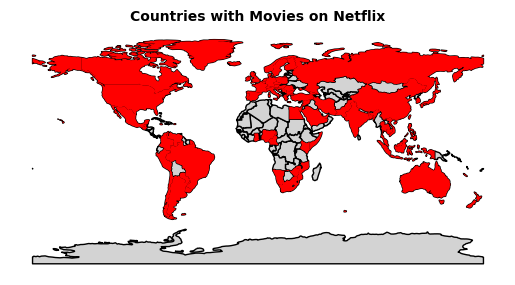

In [35]:
# visualizing the countries with and without movies on netflix
plt.figure(figsize=(15, 10))
base = world.plot(color='lightgrey', edgecolor='black')
world[world['has_movie']].plot(ax=base, color='red') # using red which is the custom color for netflix
plt.title('Countries with Movies on Netflix', fontsize=10, fontweight='bold')
plt.axis('off')
plt.savefig('map1.png', dpi=400, bbox_inches='tight')
plt.show()

#### Considering number of movies produced by different countries

In [36]:
world_merged = world.merge(movies_data, left_on='ADMIN', right_on='country', how='left')

<Figure size 2000x1500 with 0 Axes>

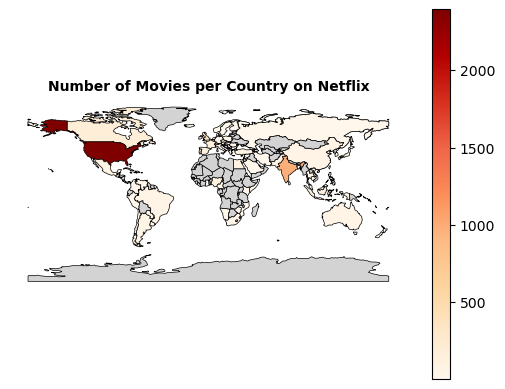

In [37]:
plt.figure(figsize=(20, 15))
world_merged.plot(column='count', 
                  cmap='OrRd',
                  legend=True,
                  missing_kwds={"color": "lightgrey"},
                  edgecolor='black', 
                  linewidth=0.5)

plt.title('Number of Movies per Country on Netflix', fontsize=10, fontweight='bold')
plt.axis('off')
plt.savefig('map2.png', dpi=600, bbox_inches='tight')
plt.show()

<Figure size 2000x1200 with 0 Axes>

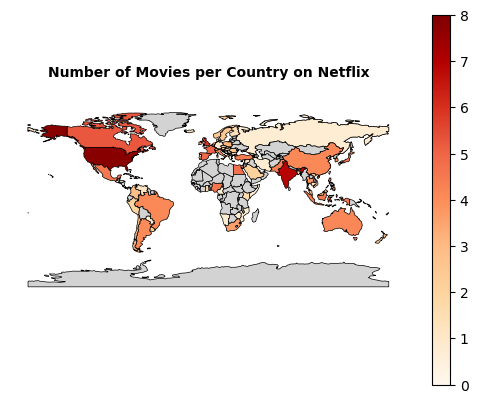

In [38]:
# scaling the count to improve color contrast
plt.figure(figsize=(20, 12))
world_merged['log_count'] = np.log1p(world_merged['count'])
world_merged.plot(column='log_count', 
                  cmap='OrRd', 
                  legend=True, 
                  vmin=0, vmax=8,
                  missing_kwds={"color": "lightgrey"},
                  edgecolor='black', 
                  linewidth=0.5)

plt.title('Number of Movies per Country on Netflix', fontsize=10, fontweight='bold', pad=20)
plt.axis('off')
plt.savefig('map3.png', dpi=600, bbox_inches='tight')
plt.show()

<Figure size 2000x1200 with 0 Axes>

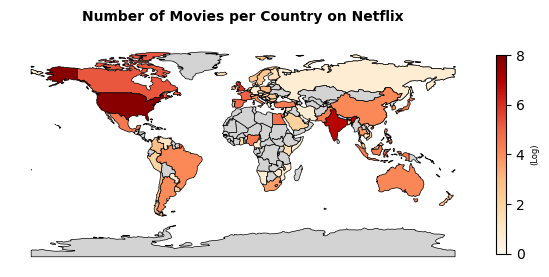

In [39]:
# resizing the legend
plt.figure(figsize=(20, 12))
world_merged['log_count'] = np.log1p(world_merged['count'])
ax = world_merged.plot(column='log_count', 
                       cmap='OrRd', 
                       legend=False, 
                       vmin=0, vmax=8, 
                       missing_kwds={"color": "lightgrey"},
                       edgecolor='black', 
                       linewidth=0.5)

sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=0, vmax=8))
sm._A = []
cbar = plt.colorbar(sm, ax=ax, fraction=0.02, pad=0.04)  
cbar.set_label('(Log)', fontsize=6)
plt.title('Number of Movies per Country on Netflix', fontsize=10, fontweight='bold', pad=15)
plt.axis('off')
plt.savefig('map4.png', dpi=600, bbox_inches='tight')
plt.show()

#### Exploring tv show data

In [40]:
print(tv_shows_data.head())

      type         country  count
0  TV Show   United States    845
1  TV Show        Pakistan    350
2  TV Show  United Kingdom    251
3  TV Show           Japan    172
4  TV Show     South Korea    165


Text(133.09722222222223, 0.5, 'Count')

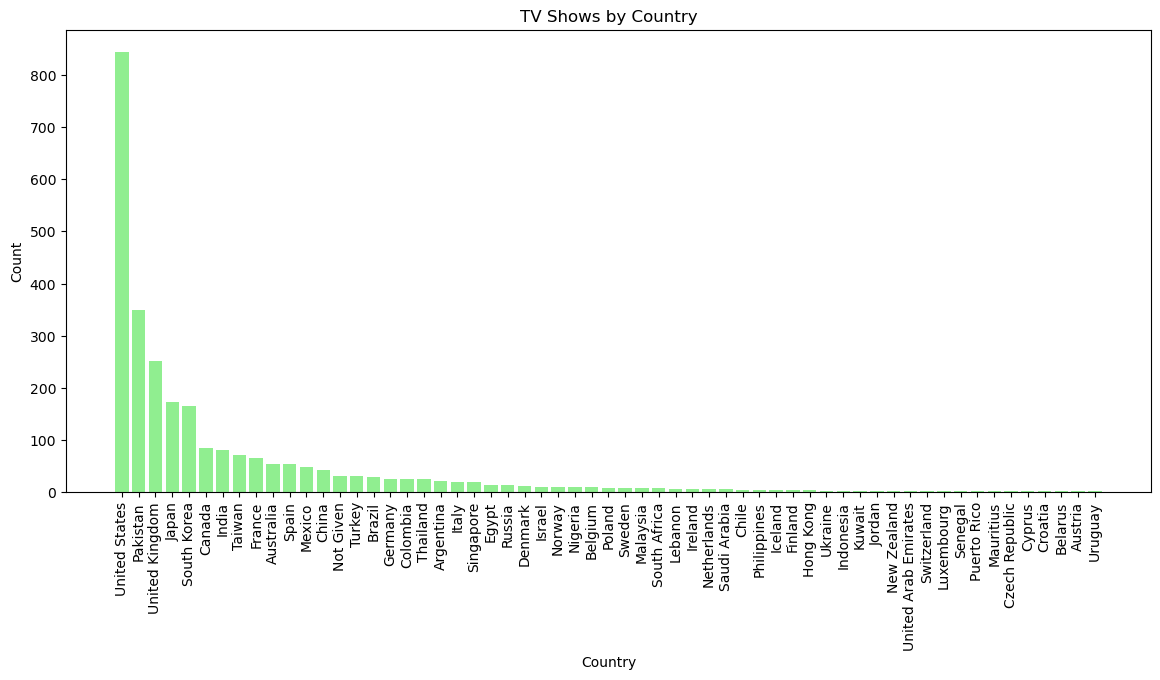

In [41]:
plt.figure(figsize=(14, 6))
plt.bar(tv_shows_data['country'], tv_shows_data['count'], color='lightgreen')
plt.xticks(rotation=90)
plt.title('TV Shows by Country')
plt.xlabel('Country')
plt.savefig('TV Shows.png', dpi=300, bbox_inches='tight')
plt.ylabel('Count')

#### More Insights

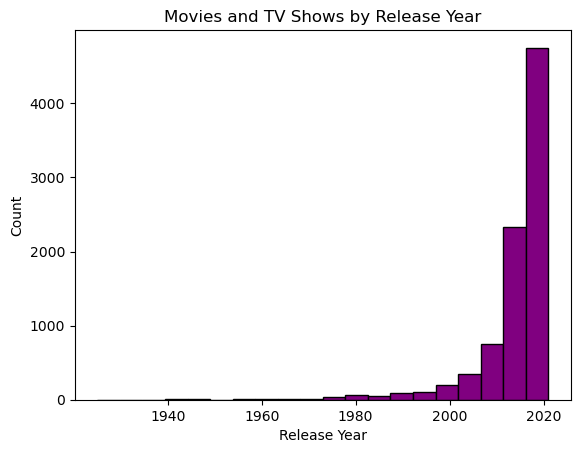

In [42]:
netflix['release_year'].hist(bins=20, color='purple', edgecolor='black')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Movies and TV Shows by Release Year')
plt.grid(False)
plt.savefig('Release Year.png', dpi=300, bbox_inches='tight')
plt.show()

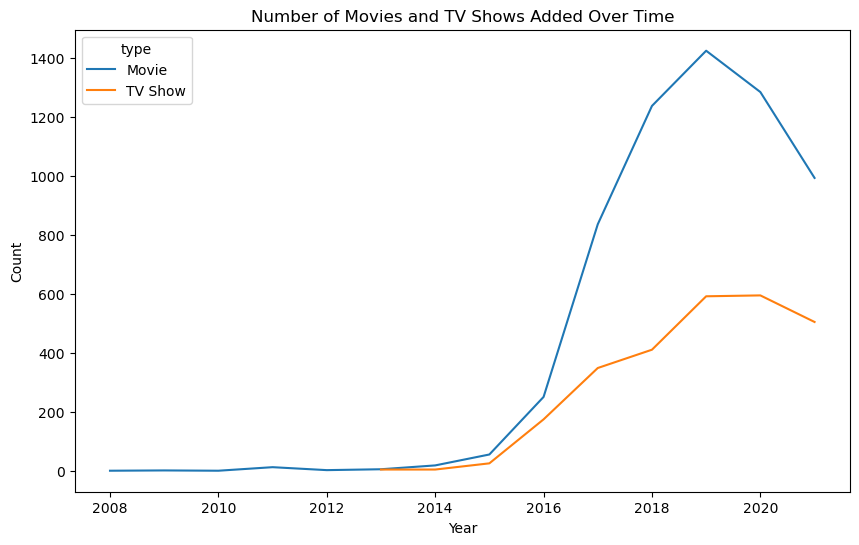

In [43]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
added_over_time = netflix.groupby([netflix['date_added'].dt.year, 'type'])['show_id'].count().unstack()
added_over_time.plot(kind='line', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Movies and TV Shows Added Over Time')
plt.savefig('Added.png', dpi=300, bbox_inches='tight')
plt.show()

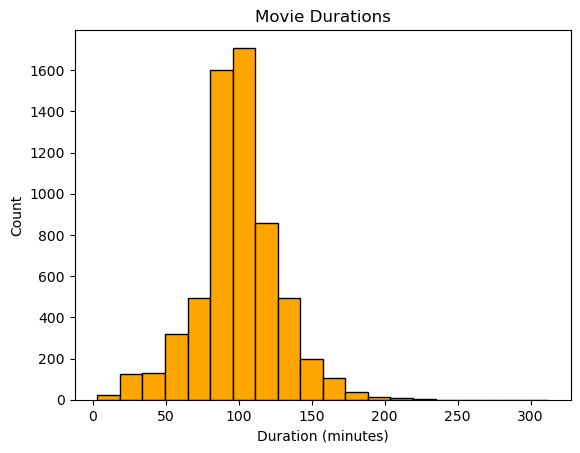

In [44]:
netflix_movies = netflix[netflix['type'] == 'Movie'].copy()  # Create a copy to avoid warnings
netflix_movies.loc[:, 'duration'] = netflix_movies['duration'].str.replace(' min', '').astype(int)

netflix_movies['duration'].hist(bins=20, color='orange', edgecolor='black')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.title('Movie Durations')
plt.grid(False)
plt.savefig('Movie Durations.png', dpi=300, bbox_inches='tight')
plt.show()

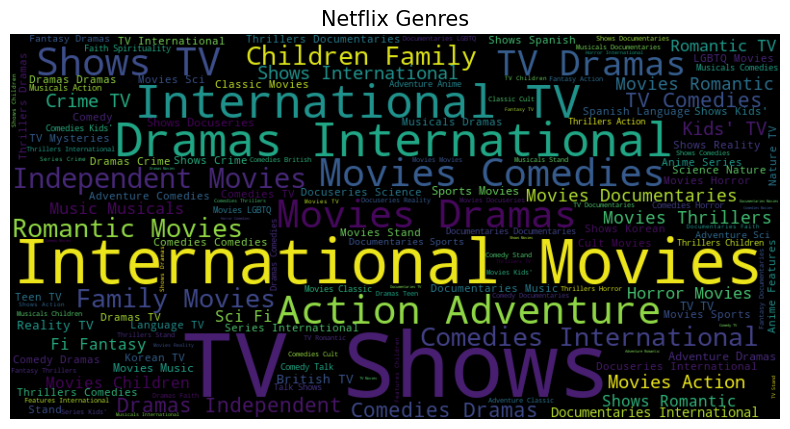

In [45]:
# visualizing the most frequently occurring genres in the dataset
from wordcloud import WordCloud

all_genres = ' '.join(netflix['listed_in'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_genres)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Netflix Genres', fontsize=15)
plt.show()

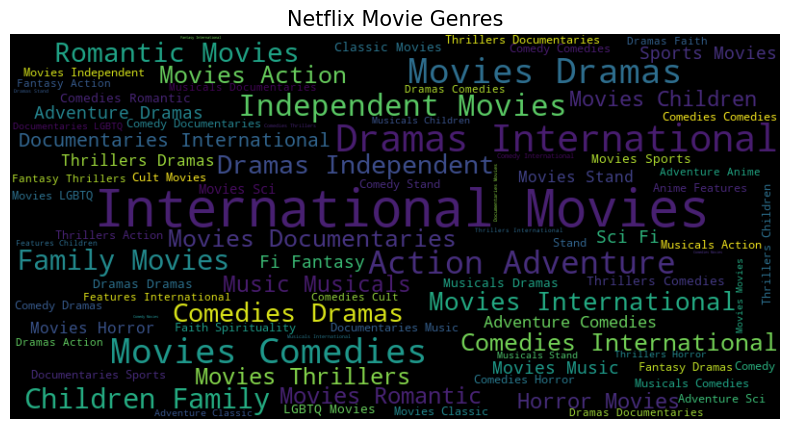

In [46]:
# creating a word cloud from genres but for movies alone
movie_data = netflix[netflix['type'] == 'Movie']
movie_genres = ' '.join(movie_data['listed_in'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(movie_genres)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Netflix Movie Genres', fontsize=15)
plt.savefig('Movie Genres.png', dpi=300, bbox_inches='tight')
plt.show()

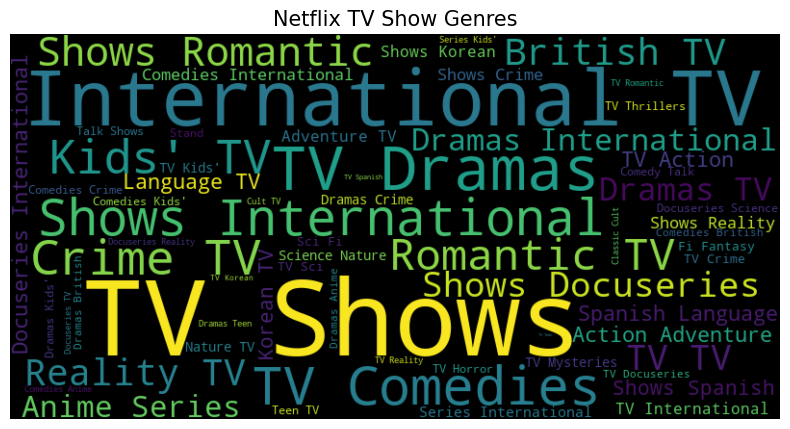

In [47]:
# creating a word cloud from genres but for tv shows alone
tv_show_data = netflix[netflix['type'] == 'TV Show']
tv_show_genres = ' '.join(tv_show_data['listed_in'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(tv_show_genres)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Netflix TV Show Genres', fontsize=15)
plt.savefig('TV Genre.png', dpi=300, bbox_inches='tight')
plt.show()

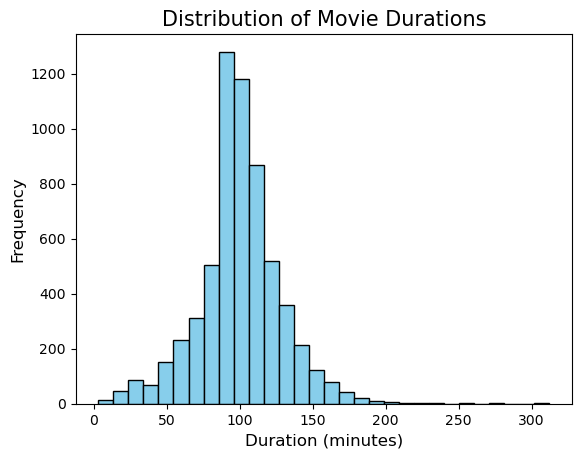

In [48]:
# distribution of movie durations to reveal common lengths
movie_data = netflix[netflix['type'] == 'Movie'].copy()

movie_data['duration'] = movie_data['duration'].str.replace(' min', '', regex=False)  # Remove ' min'
movie_data = movie_data[movie_data['duration'].str.isnumeric()] 
movie_data['duration'] = movie_data['duration'].astype(int)

# Plot histogram of movie durations
plt.hist(movie_data['duration'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Durations', fontsize=15)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.savefig('Duration Distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# variation of duration with content rating
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='duration', data=movie_data)
plt.title('Movie Duration by Rating', fontsize=15)
plt.xticks(rotation=45)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Duration (minutes)', fontsize=12)
plt.savefig('Duration by Rating.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# movie production throughout the years
netflix.groupby(["release_year"])["title"].count().plot.line(
    x="release_year",
    y="title",
);
plt.title("Number of Movies against Release Years");
plt.ylabel("Number of Movies");